<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/catsVSdogs_classification_kaggleApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 207MB/s]
100% 1.06G/1.06G [00:08<00:00, 129MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from keras import Sequential

In [7]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.


In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 5000 files belonging to 2 classes.


In [10]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [11]:
def process(image,label):
    image = tf.cast(image/255.0,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 [==============================] - 32s 143ms/step - loss: 3.3158 - accuracy: 0.5490 - val_loss: 2.6691 - val_accuracy: 0.5438
Epoch 2/10
157/157 [==============================] - 22s 137ms/step - loss: 0.9284 - accuracy: 0.5666 - val_loss: 0.8130 - val_accuracy: 0.5846
Epoch 3/10
157/157 [==============================] - 21s 135ms/step - loss: 0.7114 - accuracy: 0.6124 - val_loss: 0.6308 - val_accuracy: 0.6586
Epoch 4/10
157/157 [==============================] - 22s 137ms/step - loss: 0.6279 - accuracy: 0.6590 - val_loss: 0.5411 - val_accuracy: 0.7176
Epoch 5/10
157/157 [==============================] - 21s 129ms/step - loss: 0.5788 - accuracy: 0.6970 - val_loss: 0.5578 - val_accuracy: 0.6954
Epoch 6/10
157/157 [==============================] - 24s 154ms/step - loss: 0.5541 - accuracy: 0.7226 - val_loss: 0.6043 - val_accuracy: 0.6690
Epoch 7/10
157/157 [==============================] - 21s 130ms/step - loss: 0.5090 - accuracy: 0.7484 - val_loss: 0.5132 - val_ac

In [16]:
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
import numpy as np
import argparse
import time
import cv2

In [20]:
test_img = cv2.imread('/content/dog.jpg')

array([[[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 255, 254]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 255, 254]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 255, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
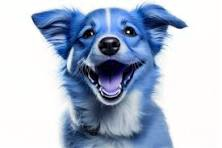

In [21]:
test_img

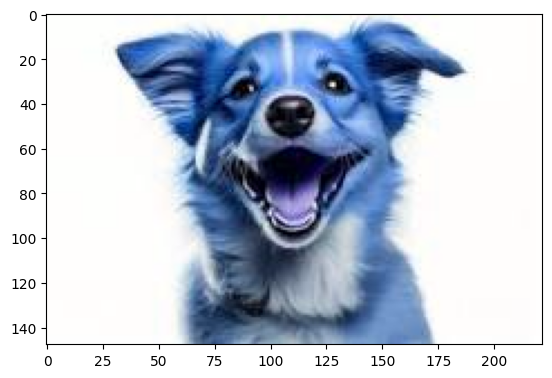

In [22]:
plt.imshow(test_img)

In [24]:
x=cv2.imread('/content/caty.jpg')
print(x)

[[[180 132   0]
  [180 132   0]
  [179 131   0]
  ...
  [195 145   1]
  [194 144   0]
  [194 144   0]]

 [[180 131   1]
  [179 130   0]
  [179 130   0]
  ...
  [194 144   0]
  [194 144   0]
  [194 144   0]]

 [[179 130   2]
  [179 130   2]
  [179 130   2]
  ...
  [194 144   0]
  [194 144   0]
  [194 144   0]]

 ...

 [[176 126   0]
  [176 126   0]
  [176 126   0]
  ...
  [219 170   0]
  [219 170   0]
  [219 170   0]]

 [[176 126   0]
  [176 126   0]
  [176 126   0]
  ...
  [219 170   0]
  [219 170   0]
  [219 170   0]]

 [[176 126   0]
  [176 126   0]
  [176 126   0]
  ...
  [220 171   1]
  [220 171   1]
  [220 171   1]]]


array([[[180, 132,   0],
        [180, 132,   0],
        [179, 131,   0],
        ...,
        [195, 145,   1],
        [194, 144,   0],
        [194, 144,   0]],

       [[180, 131,   1],
        [179, 130,   0],
        [179, 130,   0],
        ...,
        [194, 144,   0],
        [194, 144,   0],
        [194, 144,   0]],

       [[179, 130,   2],
        [179, 130,   2],
        [179, 130,   2],
        ...,
        [194, 144,   0],
        [194, 144,   0],
        [194, 144,   0]],

       ...,

       [[176, 126,   0],
        [176, 126,   0],
        [176, 126,   0],
        ...,
        [219, 170,   0],
        [219, 170,   0],
        [219, 170,   0]],

       [[176, 126,   0],
        [176, 126,   0],
        [176, 126,   0],
        ...,
        [219, 170,   0],
        [219, 170,   0],
        [219, 170,   0]],

       [[176, 126,   0],
        [176, 126,   0],
        [176, 126,   0],
        ...,
        [220, 171,   1],
        [220, 171,   1],
        [220, 171,   1]]], dtype=uint8)
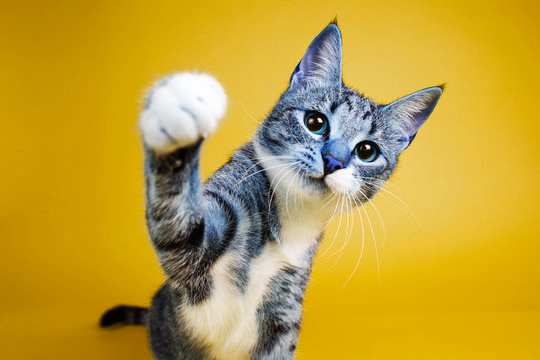

In [25]:
x